Predicting wine quality: Here I use Recursive Feature Elimination method for Feature selection and Random search for searching method. Smote and randomundersampling are used for resampling. Ensemble of some models is used for the estimator.

In [777]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
red_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(red_wine.shape)

(1599, 12)


Add a feature regarding quality

In [778]:

red_wine["wine_quality"]=red_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <=7
else 'high')
red_wine['wine_quality']= pd.Categorical(red_wine['wine_quality'], categories=['low','medium','high'])
red_wine=red_wine.drop_duplicates()
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

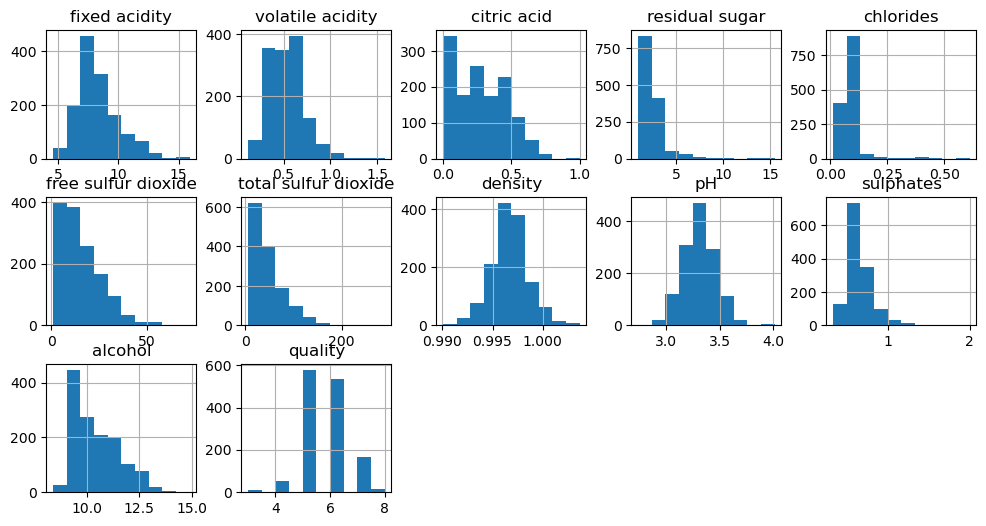

In [779]:
red_wine.hist(figsize=(12,6),layout=(3,5))

As it is seen above most of features are right-skewed. I transform the data to log to bring the destribution of data closeer to normal.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

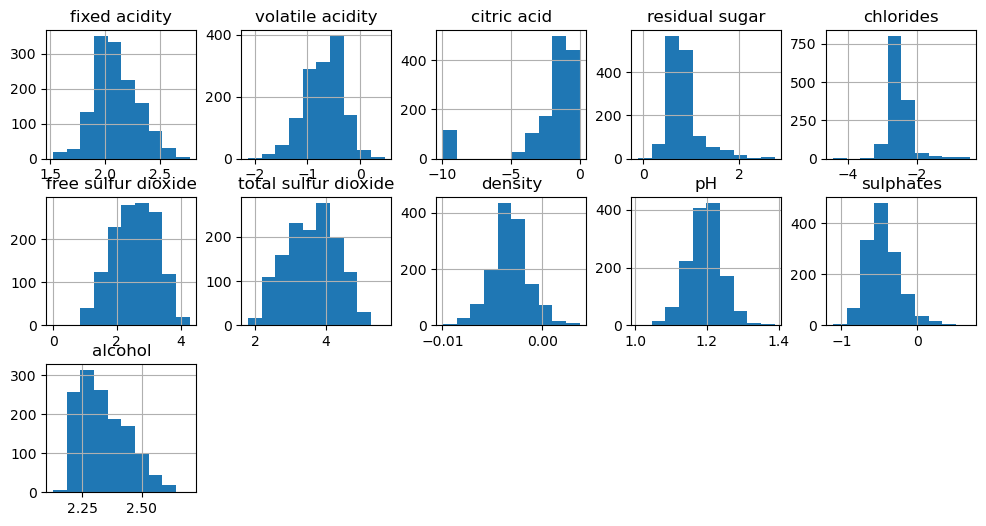

In [780]:
red_wine_t=np.log((red_wine[red_wine.columns[:-2]])+0.00005)
red_wine_t["wine_quality"]=red_wine["wine_quality"]
red_wine_t.hist(figsize=(12,6),layout=(3,5))

Plot pie chart to see the number of different wine qualities

([<matplotlib.patches.Wedge at 0x7fa0285ebd30>,
 [Text(-0.05718854349591392, 1.0985123897766544, 'low'),
  Text(0.013985176224340375, -1.0999110940644132, 'medium'),
  Text(1.0991506836631655, -0.04321775795660954, 'high')],
 [Text(-0.031193750997771226, 0.5991885762418114, '51.66'),
  Text(0.007628277940549294, -0.5999515058533162, '47.09'),
  Text(0.5995367365435448, -0.02357332252178702, '1.25')])

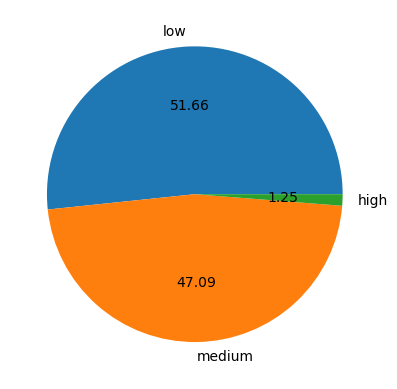

In [781]:
plt.pie(red_wine_t['wine_quality'].value_counts(), labels=red_wine_t['wine_quality'].unique(), autopct='%.2f')

In [782]:
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='high', 2,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='medium', 1,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='low', 0,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=red_wine_t['wine_quality'].astype('int32')
red_wine_t['wine_quality'].value_counts()

1    702
0    640
2     17
Name: wine_quality, dtype: int64

Split data

In [783]:
from sklearn.model_selection import train_test_split
x, y=red_wine_t[red_wine_t.columns[:-2]], red_wine_t[red_wine_t.columns[-1]]
x=np.array(x)
y=np.array(y)
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42,stratify=y) 

Create pipelines to use in nested cross validation

In [784]:
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier as Xgb
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier as LighGB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, make_scorer, balanced_accuracy_score
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearnex import patch_sklearn 
from pandas import MultiIndex, Int64Index
patch_sklearn()

# initiakising classifiers

m1 = LogisticRegression(multi_class='multinomial',
                          max_iter=3000,
                          solver='saga'
                          ,random_state=42
                          )
m2 = AdaBoostClassifier(random_state=42)
m3 = DecisionTreeClassifier(random_state=42)
m4 = LighGB(random_state=1)
m5 = RandomForestClassifier(random_state=42)
m6= SVC()
m7=XGBClassifier(use_label_encoder=False,disable_default_eval_metric =True,random_state=42)

m8=GradientBoostingClassifier(random_state=42)
models = list()

Ada = Pipeline([('m', AdaBoostClassifier())])
models.append(('ada', Ada))

des = Pipeline([('m', DecisionTreeClassifier())])
models.append(('des', des))

log = Pipeline([('m', LogisticRegression())])
models.append(('log', log))
# define the voting ensemble
#ensemble = VotingClassifier(estimators=[ 
#    ('log', LogisticRegression()), ('ada', AdaBoostClassifier()),('des',DecisionTreeClassifier())
#    ], voting='soft')
ensemble = VotingClassifier(estimators=[('ada', AdaBoostClassifier()),('log',LogisticRegression())], voting='soft')
# define pipeline
# Building the pipelines
pipe1 = Pipeline([('scale', MinMaxScaler()), ('oversample', SMOTE()),('undersample', RandomUnderSampler()),('rfe', RFE(estimator=ensemble)),
                  ('ens', ensemble)])

# Setting up the parameter grids
# Setting up the parameter grids


par1 = [{ "oversample__sampling_strategy":['auto','minority'], 
        "rfe__n_features_to_select": [4,6,8,10],"ens__ada__n_estimators":[50,100,200,400,600], 
"ens__ada__learning_rate": [0.01,0.001,0.1,0.2]
                ,'ens__log__C': [0.5,0.2,1]}]  


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Creat inner CV

In [785]:
pipe=[pipe1]
par_grid=[par1]
gcv_all=[]
f1 = make_scorer(f1_score , average='macro')

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i in range(len(pipe)):
    gcv = RandomizedSearchCV(estimator=pipe[i],
                        param_distributions=par_grid[i],
                        scoring='balanced_accuracy',
                        n_jobs=-1,
                        n_iter=30,
                        cv=inner_cv,
                        verbose=0,
                        refit=True)
    gcv_all.append(gcv)


Function for ploting learning curves

In [786]:

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 20)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring= "balanced_accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [787]:
def con(y_test,pred_rfc):
    labels = np.unique(y_test)
    a = confusion_matrix(y_test, pred_rfc)
    a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
    display(a)















Out CV + plotting learning curves 

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

  Ensemble of Logistic regression and AdaBoostClassifier


 Score of gcv_out prediction 44.13%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto', 'ens__log__C': 1, 'ens__ada__n_estimators': 600, 'ens__ada__learning_rate': 0.01}
       Score of best estimator prediction 44.13%


 Score of gcv_out prediction 46.97%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto', 'ens__log__C': 0.5, 'ens__ada__n_estimators': 400, 'ens__ada__learning_rate': 0.001}
       Score of best estimator prediction 46.97%


 Score of gcv_out prediction 46.59%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto', 'ens__log__C': 1, 'ens__ada__n_estimators': 200, 'ens__ada__learni

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




 Score of gcv_out prediction 49.57%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto', 'ens__log__C': 0.2, 'ens__ada__n_estimators': 200, 'ens__ada__learning_rate': 0.001}
       Score of best estimator prediction 49.57%


 Score of gcv_out prediction 42.66%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto', 'ens__log__C': 1, 'ens__ada__n_estimators': 100, 'ens__ada__learning_rate': 0.001}
       Score of best estimator prediction 42.66%


 Score of gcv_out prediction 46.40%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto', 'ens__log__C': 0.2, 'ens__ada__n_estimators': 200, 'ens__ada__learning_rate': 0.001}
       Score of best estimator prediction 46.40%


 Score of gcv_out prediction 43.84%
        Best parameters in inner CV: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto', 

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

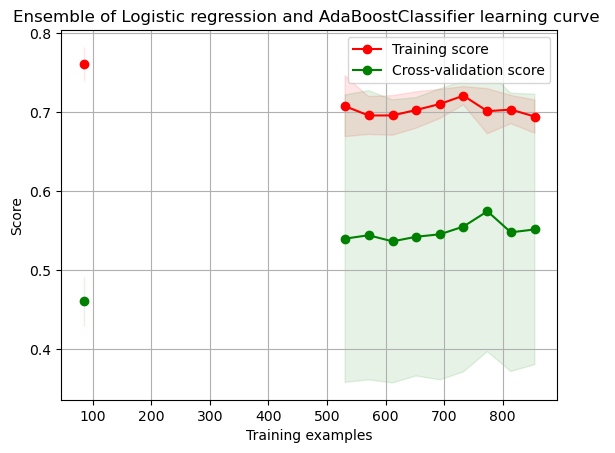

Best CV accuracy: 51.21%
Best parameters: {'rfe__n_features_to_select': 10, 'oversample__sampling_strategy': 'auto'}
test accuracy: 54.03%
train accuracy: 98.59%


,low,medium,high
low,160,66,0
medium,30,124,4
high,2,21,1


In [793]:
import warnings
warnings.simplefilter('ignore')
final_scores = []
final_mean_score=[]
final_std_score=[]


outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
name=['Ensemble of Logistic regression and AdaBoostClassifier'] 



count=0   
for gcv_out in gcv_all:  
    print(80*'_.')
    print('\n ', name[count] )  
    for train_idx, test_idx in outer_cv.split(X_train, y_train): 
        gcv_out.fit(X_train[train_idx], y_train[train_idx]) # run inner loop hyperparam tuning
        pr=gcv_out.predict(X_train[test_idx]) 
        print('\n\n Score of gcv_out prediction %.2f%%' % ((balanced_accuracy_score(pr, y_train[test_idx]))*100))


        print('        Best parameters in inner CV:', gcv_out.best_params_)
        
    
        final_scores.append((balanced_accuracy_score(gcv_out.best_estimator_.predict(X_train[test_idx]), y_train[test_idx])*100)) 
  
        print('       Score of best estimator prediction %.2f%%' % final_scores[-1])
        model=gcv_out.best_estimator_.fit(X_train[train_idx], y_train[train_idx])





    
    print('\n    Outer Loop:')
    print('        balanced accuracy score %.2f%% +/- %.2f' % 
                (np.mean(final_scores) , np.std(final_scores) ))
    final_mean_score.append(np.mean(final_scores) )
    final_std_score.append(np.std(final_scores) )

    plot_learning_curve(estimator = gcv_out.best_estimator_,title = "{} learning curve ".format(name[count]),
                    X = X_train, y = y_train, cv = 10)
    plt.show()
    train_sizes, train_scores, test_scores = learning_curve(
    gcv_out.best_estimator_, X = X_train, y = y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring= "balanced_accuracy")
    m=gcv_model_select.best_estimator_.fit(X_train, y_train)
    print('Best CV accuracy: %.2f%%' % (gcv_model_select.best_score_*100))
    print('Best parameters:', gcv_model_select.best_params_)
    print('test accuracy: %.2f%%' % (balanced_accuracy_score(y_test, m.predict(X_test))*100))
    print('train accuracy: %.2f%%' % (balanced_accuracy_score(y_train, m.predict(X_train))*100))
    con(m.predict(X_test),y_test)
    count+=1


Comparing scores of different models

In [794]:
from sklearn.metrics import classification_report
print(classification_report(y_test, m.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       192
           1       0.78      0.59      0.67       211
           2       0.04      0.20      0.07         5

    accuracy                           0.70       408
   macro avg       0.51      0.54      0.50       408
weighted avg       0.74      0.70      0.71       408



In [795]:
from sklearn.metrics import balanced_accuracy_score
print("Balaced accuracy is : %.2f%%" %(balanced_accuracy_score(y_test, m.
predict(X_test))*100))

Balaced accuracy is : 54.03%
